In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [98]:
# Taking the data from a folder and considering only the first 4 columns as the rest are null
directory='Untitled Folder'
csv_files=[f for f in os.listdir(directory) if f.endswith('.csv')]
all_data=[]
for i in csv_files:
    df=pd.read_csv(os.path.join(directory, i))
    df.columns=['Output1','Output2','Output3','Output4','Output5','Output6','Output7','Output8']
    data=df.iloc[:, :4]
    all_data.append(data)
data=pd.concat(all_data, ignore_index=True)
data.head()

,Output1,Output2,Output3,Output4
0,106777,28469,197308,159105
1,106868,28584,197413,159166
2,107371,28840,197733,159248
3,107598,28883,197849,159265
4,107234,28641,197609,159191


In [99]:
start_markers = ['start one.png', 'start five.jpg', 'start nine.jpg', 'start six.jpg', 'start zero.png', 'start animal.jpg', 'start four.jpg', 'start eight.jpg', 'start three.jpg', 'start seven.jpg', 'start two.jpg']
end_markers = ['end one.png', 'end five.jpg', 'end nine.jpg', 'end six.jpg', 'end zero.png', 'end animal.jpg', 'end four.jpg', 'end eight.jpg', 'end three.jpg', 'end seven.jpg', 'end two.jpg']

In [100]:
## Extracting the data between the start and end of a numeic or non numeric data.
def extract_center_rows(data, start_range, end_range, length):
    if start_range > end_range:
        raise ValueError("start_range should be less than or equal to end_range")

    if end_range - start_range < length:
        return False, 0

    range_data = data.loc[start_range:end_range]
    if length > len(range_data):
        raise ValueError("The specified length is greater than the number of rows in the range")

    center_index = len(range_data) // 2
    start_index = max(0, center_index - length // 2)
    end_index = start_index + length
    center_rows = range_data.iloc[start_index:end_index]

    return True, center_rows

In [101]:
#To extract the start and end index of the numbers shown and appending their data to X with labels in Y
def extract_data_between_markers(data, start_markers, end_markers, datashape):
    X = []
    Y = []
    between_markers = False
    label = None
    start_idx = None
    end_idx = None
    df_temp = []
    segment_lengths = []

    marker_to_label = {
        'start one.png': 1, 'end one.png': 1,
        'start two.jpg': 2, 'end two.jpg': 2,
        'start three.jpg': 3, 'end three.jpg': 3,
        'start four.jpg': 4, 'end four.jpg': 4,
        'start five.jpg': 5, 'end five.jpg': 5,
        'start six.jpg': 6, 'end six.jpg': 6,
        'start seven.jpg': 7, 'end seven.jpg': 7,
        'start eight.jpg': 8, 'end eight.jpg': 8,
        'start nine.jpg': 9, 'end nine.jpg': 9,
        'start zero.png': 0, 'end zero.png': 0,
        'start animal.jpg': -1, 'end animal.jpg': -1
    }

    for index, row in data.iterrows():
        if row.iloc[0] in start_markers:
            label = marker_to_label[row.iloc[0]]
            start_idx = index
            between_markers = True
            df_temp = []
            print(f"Start marker found at index {index}, label {label},{row.iloc[0]}")
        elif row.iloc[0] in end_markers:
            if between_markers and len(df_temp) > 0:
                end_idx = index
                success, extracted_data = extract_center_rows(data, start_idx, end_idx, datashape[0])
                if success:
                    X.append(extracted_data.values.astype(float))
                    Y.append(label)
                    print(f"End marker found at index {index}, segment length {len(df_temp)}")
                segment_lengths.append(len(df_temp))
            between_markers = False
        elif between_markers:
            df_temp.append(row.iloc[:4].values.tolist())

    X = np.array(X)
    Y = np.array(Y)

    print("Total segments found:", len(segment_lengths))
    print("Segment lengths:", segment_lengths)
    print("Number of segments meeting length requirement:", len(X))

    return X, Y

In [102]:
datashape = (1000, 4)# Taking the shape of the data considering four channels but the length is not fixed it has to be greater than 1000

X, Y = extract_data_between_markers(data, start_markers, end_markers, datashape)


print("X shape:", X.shape)
print("Y shape:", Y.shape)

print("Unique labels in Y:", np.unique(Y))

Start marker found at index 2303, label 4,start four.jpg
End marker found at index 3584, segment length 1280
Start marker found at index 4353, label 6,start six.jpg
End marker found at index 5634, segment length 1280
Start marker found at index 6342, label 9,start nine.jpg
End marker found at index 7556, segment length 1213
Start marker found at index 8453, label 0,start zero.png
End marker found at index 9734, segment length 1280
Start marker found at index 10503, label 5,start five.jpg
End marker found at index 11784, segment length 1280
Start marker found at index 12681, label 2,start two.jpg
End marker found at index 13962, segment length 1280
Start marker found at index 14603, label 8,start eight.jpg
End marker found at index 15884, segment length 1280
Start marker found at index 16896, label 1,start one.png
End marker found at index 18062, segment length 1165
Start marker found at index 18959, label -1,start animal.jpg
End marker found at index 20240, segment length 1280
Start ma

Marking non numeric data as 1 and numeric as 0


In [163]:
y_num_non=[]
c=0 # The number of non-numeric points
for i in Y:
    if i == -1:
        y_num_non.append(1)
        c=c+1
    else:
        y_num_non.append(0)
print(y_num_non)


[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [165]:
print(len(y_num_non))

194


In [152]:
# scaler = RobustScaler()
# scaler.fit(X[0])
# for i,x in enumerate(X):
#     X[i] = scaler.transform(x)


In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[0])
for i, x in enumerate(X):
    X[i] = scaler.transform(x)

In [154]:
print(c)
print(len(y_num_non))

18
194


In [155]:
print(X.shape)

(194, 1000, 4)


In [84]:
#Approach by downsampling the data but was less accurate
# y_aug=[]
# x_aug=[]
# count=0
# for i in range(len(y_num_non)):
#     if y_num_non[i] == 0:
#         count=count+1
#         if (count)<=c+3:
#            y_aug.append(0)
#            x_aug.append(X[i])
#     else:
#         y_aug.append(1)
#         x_aug.append(X[i])

# y_resized=np.array(y_aug)
# print(len(y_aug))
# x_resized=np.array(x_aug)

39


In [166]:
#Data augmentaion using time slicing
X = np.array(X)
Y=np.array(y_num_non)
new_data=[]
new_data_y=[]
X_filtered = X[Y == 0]
new_data_point = []
for j in range(170):
    random_indices = np.random.choice(len(X_filtered), size=4, replace=False)
    X_sampled = X[random_indices]
    X_sampled = np.array(X_sampled)
    num_portions = X_sampled.shape[0]
    portion_size = X_sampled.shape[1] // num_portions


        # new_data_point.append() = X_sampled[i, i*portion_size:(i+1)*portion_size]
    new_data_point.append(np.concatenate((X_sampled[0][:250],X_sampled[1][250:500],X_sampled[2][500:750],X_sampled[3][750:1000]),axis=0))

        # print(np.concatenate((X_sampled[0][:250],X_sampled[1][250:500],X_sampled[2][500:750],X_sampled[3][750:1000]),axis=0))

new_data=np.array(new_data_point)
new_data_y = [1] * len(new_data)
new_data_y=np.array(new_data_y)
y_aug=np.concatenate((Y, new_data_y), axis=0)

x_aug=np.concatenate((X, new_data), axis=0)



In [167]:
new_data.shape
new_data_y.shape

(170,)

In [168]:
print(y_aug.shape,x_aug.shape)

(364,) (364, 1000, 4)


In [169]:
print(y_aug)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [170]:
print(len(new_data))
print(new_data)

170
[[[ 96.47711633 199.6782161  -24.83639567 -32.48462502]
  [ 96.45248626 199.79888232 -24.84631331 -32.47399594]
  [ 96.45290371 199.74860473 -24.84192666 -32.47532458]
  ...
  [153.2294066  588.57370179 188.16566797 228.44467749]
  [153.3158206  588.53012788 188.19446727 228.48453654]
  [153.44147574 588.37091551 188.23089552 228.53475895]]

 [[121.82146593 501.35046207 140.85548342 184.31087665]
  [121.86738641 500.95997279 140.87913317 184.34249816]
  [121.84233887 501.09237044 140.8665454  184.32788318]
  ...
  [ 92.47159782 201.36251538 -23.98843763 -32.33448927]
  [ 92.47243274 201.32061738 -23.97756637 -32.33502072]
  [ 92.49915011 200.87649867 -23.96936525 -32.35176152]]

 [[ 91.14073873 184.72901256 -26.80447463 -36.25927711]
  [ 91.17163069 184.4340507  -26.78921673 -36.27282919]
  [ 91.18123224 184.43069886 -26.7930312  -36.27867518]
  ...
  [ 75.7385912  151.85417213 -30.37863877 -34.95083734]
  [ 75.75320226 151.57596946 -30.37692225 -34.96173215]
  [ 75.75403718 151.68

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_aug,y_aug,test_size=0.2,random_state=42)

In [172]:
model = Sequential([
    keras.layers.Conv1D(32, 2, activation='relu', input_shape=(1000, 4)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(64, 2, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(128, 2, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    # keras.layers.Dropout(0.5)
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 999, 32)           288       
                                                                 
 max_pooling1d_36 (MaxPooli  (None, 499, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_37 (Conv1D)          (None, 498, 64)           4160      
                                                                 
 max_pooling1d_37 (MaxPooli  (None, 249, 64)           0         
 ng1D)                                                           
                                                                 
 conv1d_38 (Conv1D)          (None, 248, 128)          16512     
                                                                 
 max_pooling1d_38 (MaxPooli  (None, 124, 128)         

In [173]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_test = np.array(x_test)

In [174]:
history = model.fit(x_train,y_train,epochs=50,validation_split=0.1,validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 3s 117ms/step - loss: 104.7220 - accuracy: 0.5189 - val_loss: 3.8987 - val_accuracy: 0.5068
Epoch 2/50
10/10 [==============================] - 1s 91ms/step - loss: 2.6075 - accuracy: 0.5601 - val_loss: 0.8343 - val_accuracy: 0.6575
Epoch 3/50
10/10 [==============================] - 1s 89ms/step - loss: 1.1026 - accuracy: 0.6907 - val_loss: 0.5869 - val_accuracy: 0.6986
Epoch 4/50
10/10 [==============================] - 1s 89ms/step - loss: 0.5499 - accuracy: 0.7320 - val_loss: 0.2085 - val_accuracy: 0.8904
Epoch 5/50
10/10 [==============================] - 1s 88ms/step - loss: 0.3384 - accuracy: 0.8763 - val_loss: 0.2096 - val_accuracy: 0.9726
Epoch 6/50
10/10 [==============================] - 1s 88ms/step - loss: 0.2511 - accuracy: 0.9244 - val_loss: 0.1826 - val_accuracy: 0.9452
Epoch 7/50
10/10 [==============================] - 1s 138ms/step - loss: 0.2658 - accuracy: 0.9244 - val_loss: 0.1515 - val_accuracy: 0.9863
Epoch 8/5

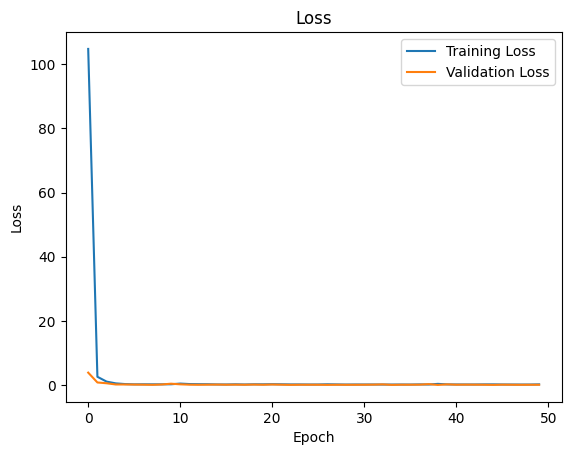

In [176]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

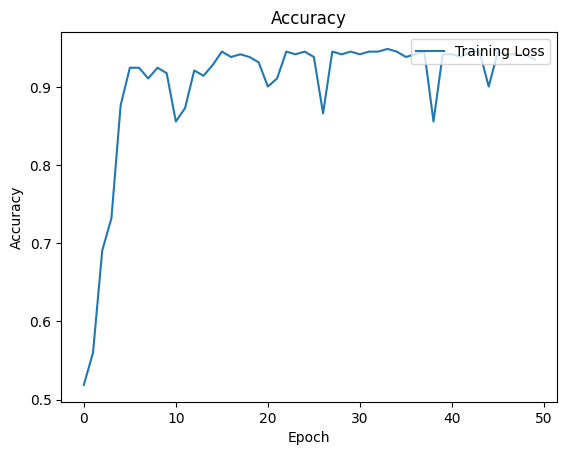

In [177]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [178]:
loss, accuracy = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
predicted_classes = (y_pred >= 0.5).astype(int)
for i in range(len(y_pred)):
    print(f"Prediction: {predicted_classes[i]}, True Label: {y_test[i]}")
print(f'Test Accuracy: {accuracy * 100:.2f}%')


3/3 [==============================] - 0s 14ms/step
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], T

In [179]:
y_pred=model.predict(x_train)
predicted_classes = (y_pred >= 0.5).astype(int)
for i in range(len(y_pred)):
    print(f"Prediction: {predicted_classes[i]}, True Label: {y_train[i]}")

10/10 [==============================] - 0s 18ms/step
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 1
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [1],

10/10 [==============================] - 0s 18ms/step


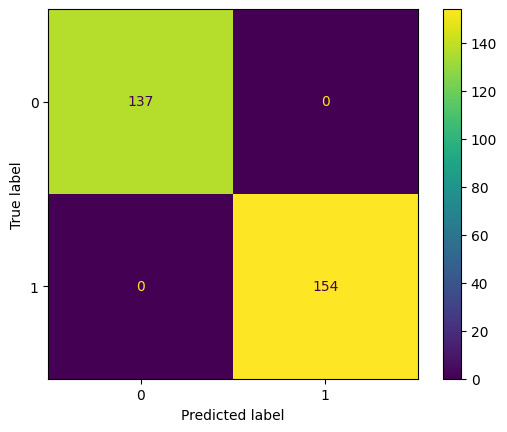

In [180]:
y_pred=model.predict(x_train)
predicted_classes = (y_train >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, predicted_classes,labels=[0,1])
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

3/3 [==============================] - 0s 14ms/step


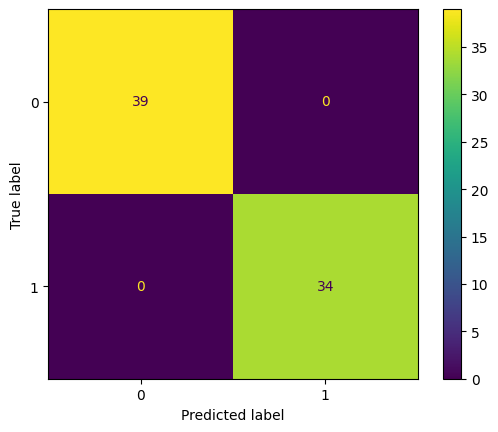

In [181]:
y_pred=model.predict(x_test)
predicted_classes = (y_test >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, predicted_classes,labels=[0,1])
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

In [182]:
from sklearn.metrics import classification_report,precision_score,f1_score

# Assuming y_pred is your model's predictions
y_pred = model.predict(x_train)

# Convert probabilities to class labels
y_pred = (y_pred >= 0.5).astype(int)

# Calculate precision, recall, and F1-score
print(classification_report(y_train, y_pred, target_names=['class 0', 'class 1']))

10/10 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

     class 0       0.90      1.00      0.94       137
     class 1       1.00      0.90      0.95       154

    accuracy                           0.95       291
   macro avg       0.95      0.95      0.95       291
weighted avg       0.95      0.95      0.95       291

